In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv('cyclistic_cleaned.csv')

In [116]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_minutes,same_location,day_of_week,month
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,7.53,False,Friday,January
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,7.22,False,Monday,January
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,8.00,False,Saturday,January
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,29.82,False,Monday,January
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,26.20,False,Wednesday,January


In [117]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [118]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_minutes,same_location,day_of_week,month
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,7.53,False,Friday,January
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,7.22,False,Monday,January
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,8.00,False,Saturday,January
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,29.82,False,Monday,January
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,26.20,False,Wednesday,January


In [119]:
palette = [
    "#4285F4",  # azul (primária)
    "#EA4335",  # vermelho (secundária)
    "#FBBC05",  # amarelo
    "#34A853",  # verde
    "#FF6D01",  # laranja
    "#46BDC6",  # ciano claro
]

# Configuração do Seaborn e Matplotlib
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(palette))  # ou use "deep", "muted", "dark", "colorblind"

# Aumenta tamanho dos gráficos e fontes
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### 1. Proporção de Ciclistas por Tipo de Usuário

In [120]:
# Contagem de viagens por tipo de usuário
user_counts = df['member_casual'].value_counts()
user_proportion = df['member_casual'].value_counts(normalize=True)
print("Contagem de viagens por tipo de usuário:\n", user_counts)
print("\nProporção de viagens por tipo de usuário:\n", user_proportion)

Contagem de viagens por tipo de usuário:
 member_casual
member    2749419
casual    1695930
Name: count, dtype: int64

Proporção de viagens por tipo de usuário:
 member_casual
member    0.618493
casual    0.381507
Name: proportion, dtype: float64


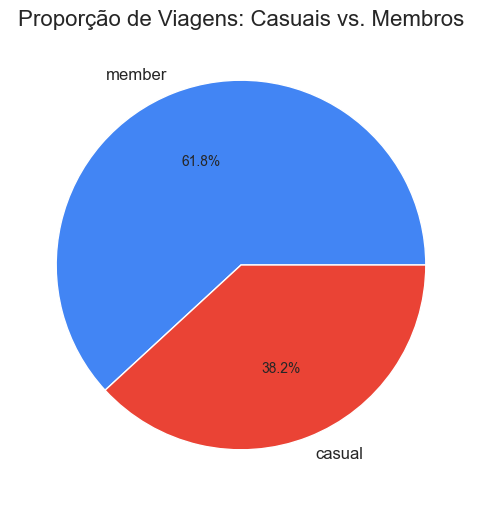

In [121]:
# Visualização: Gráfico de pizza
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
plt.pie(user_proportion, labels=user_proportion.index, autopct='%1.1f%%')
plt.title('Proporção de Viagens: Casuais vs. Membros')
plt.savefig('imgs/user_proportion_pie.png')
plt.show()
plt.close()

In [122]:
# Variação mensal
df['month'] = df['started_at'].dt.to_period('M')
monthly_counts = df.groupby(['month', 'member_casual']).size().unstack().fillna(0)
monthly_proportion = monthly_counts.div(monthly_counts.sum(axis=1), axis=0)

# Convert PeriodIndex to string for plotting
monthly_proportion.index = monthly_proportion.index.astype(str)

# Reset index to make 'month' a column (optional, for long format)
monthly_proportion_reset = monthly_proportion.reset_index()

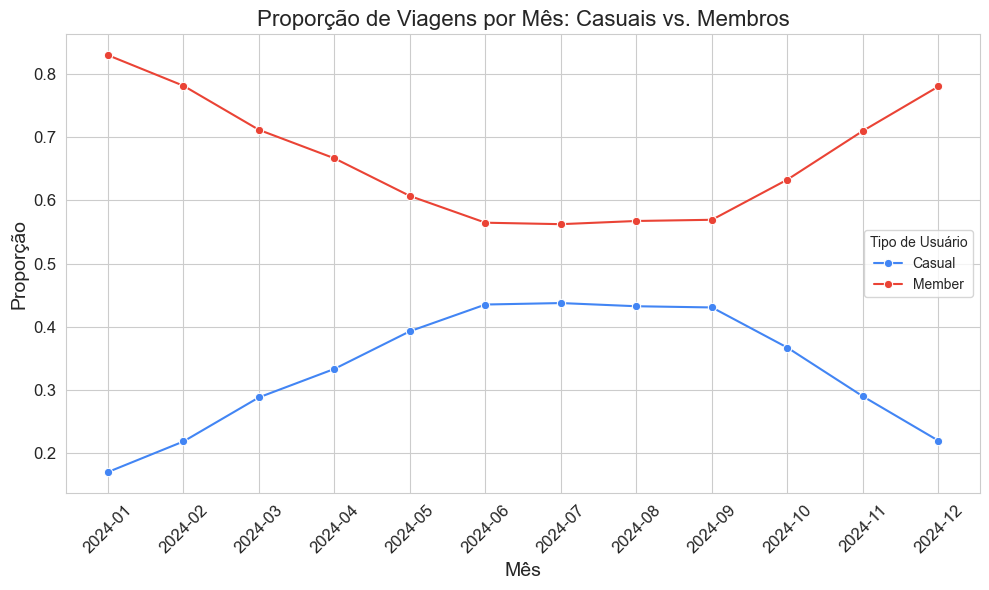

In [123]:
# Plot using seaborn.lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_proportion_reset, x='month', y='casual', marker='o', label='Casual')
sns.lineplot(data=monthly_proportion_reset, x='month', y='member', marker='o', label='Member')
plt.title('Proporção de Viagens por Mês: Casuais vs. Membros')
plt.xlabel('Mês')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Usuário')
plt.tight_layout()
plt.savefig('imgs/monthly_user_proportion.png')
plt.show()
plt.close()

### 2. Padrões por Dia da Semana

<Figure size 1000x600 with 0 Axes>

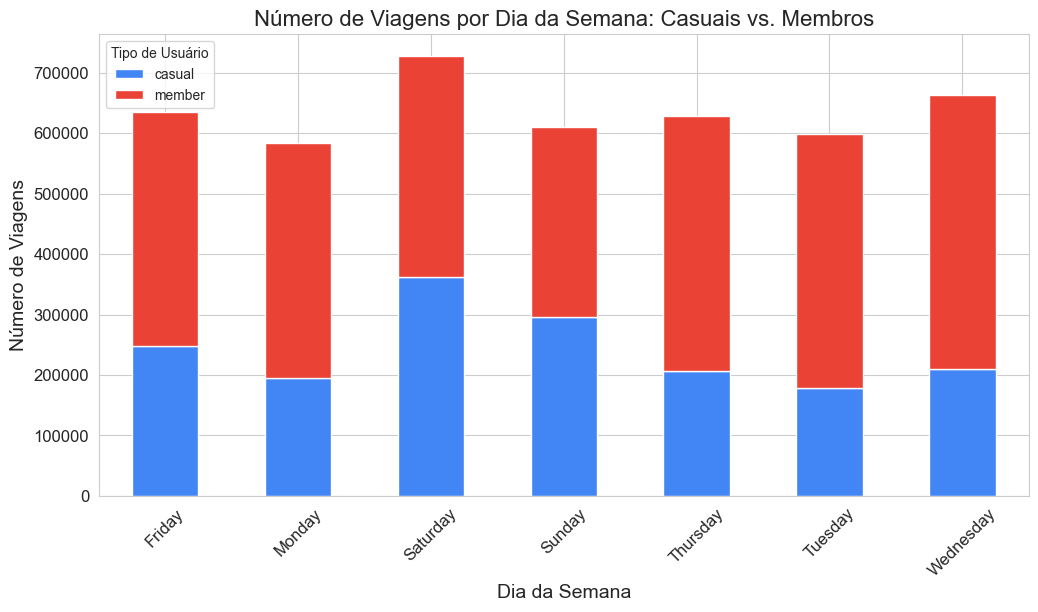

Dias de maior movimento:
 member_casual
casual     Saturday
member    Wednesday
dtype: object


In [142]:
# Contagem de viagens por dia e tipo de usuário
day_counts = df.groupby(['day_of_week', 'member_casual']).size().unstack().fillna(0)

# Visualização: Gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', stacked=True, color=sns.color_palette(palette))
plt.title('Número de Viagens por Dia da Semana: Casuais vs. Membros')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Viagens')
plt.xticks(ticks=range(7), rotation=45)
plt.legend(title='Tipo de Usuário')
plt.savefig('imgs/day_of_week_counts.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Dias de maior movimento por grupo
peak_days = day_counts.idxmax()
print("Dias de maior movimento:\n", peak_days)

### 3. Duração média das corridas

In [125]:
# Média de duração por tipo de usuário
duration_mean = df.groupby('member_casual')['duration_minutes'].mean()
print("Duração média das viagens (minutos):\n", duration_mean)

Duração média das viagens (minutos):
 member_casual
casual    22.597528
member    14.735381
Name: duration_minutes, dtype: float64


In [126]:
# Média por dia da semana
duration_by_day = df.groupby(['day_of_week', 'member_casual'])['duration_minutes'].mean().unstack()

<Figure size 1000x600 with 0 Axes>

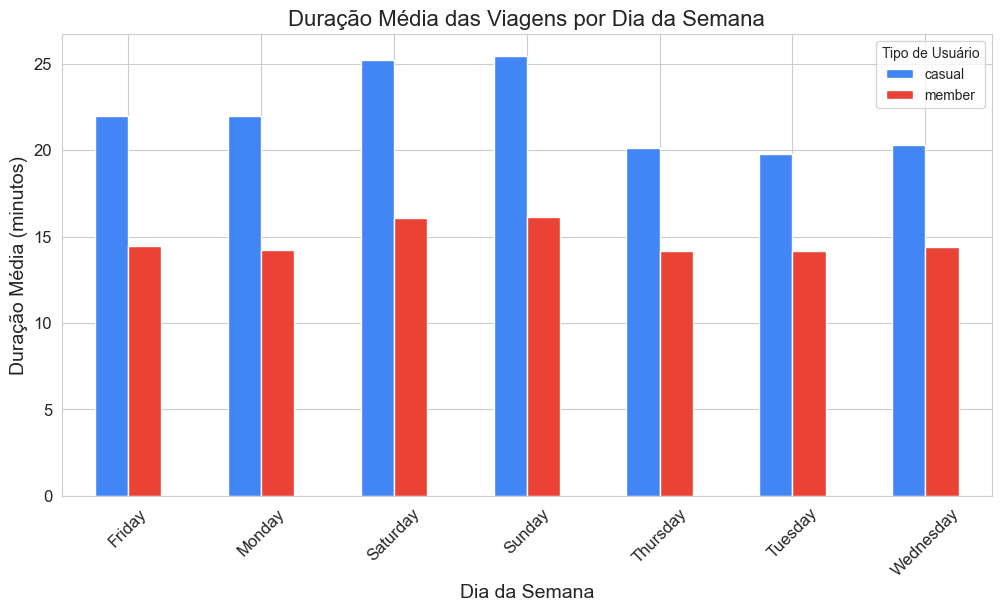

In [141]:
# Visualização: Gráfico de barras
plt.figure(figsize=(10, 6))
duration_by_day.plot(kind='bar', color=sns.color_palette(palette))
plt.title('Duração Média das Viagens por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Duração Média (minutos)')
plt.xticks(ticks=range(7), rotation=45)
plt.legend(title='Tipo de Usuário')
plt.savefig('imgs/duration_by_day.png',dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 4. Distância Média das Viagens

In [128]:
from math import radians, sin, cos, sqrt, atan2

# Função para calcular distância (em km) usando Haversine
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Raio da Terra em km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

In [129]:
# Calcular distância para cada viagem
df['distance_km'] = df.apply(
    lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1
)

In [130]:
# Média de distância por tipo de usuário
distance_mean = df.groupby('member_casual')['distance_km'].mean()
print("Distância média das viagens (km):\n", distance_mean)

Distância média das viagens (km):
 member_casual
casual    2.557753
member    2.708686
Name: distance_km, dtype: float64


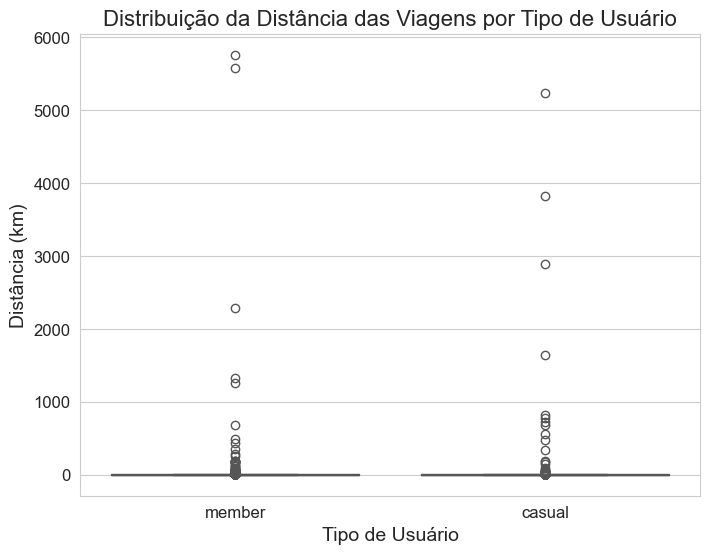

In [131]:
# Visualização: Boxplot de distâncias
plt.figure(figsize=(8, 6))
sns.boxplot(x='member_casual', y='distance_km', data=df, hue='member_casual', legend=False)
plt.title('Distribuição da Distância das Viagens por Tipo de Usuário')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Distância (km)')
plt.savefig('imgs/distance_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 5. Preferências por Tipo de Bicicleta

<Figure size 1000x600 with 0 Axes>

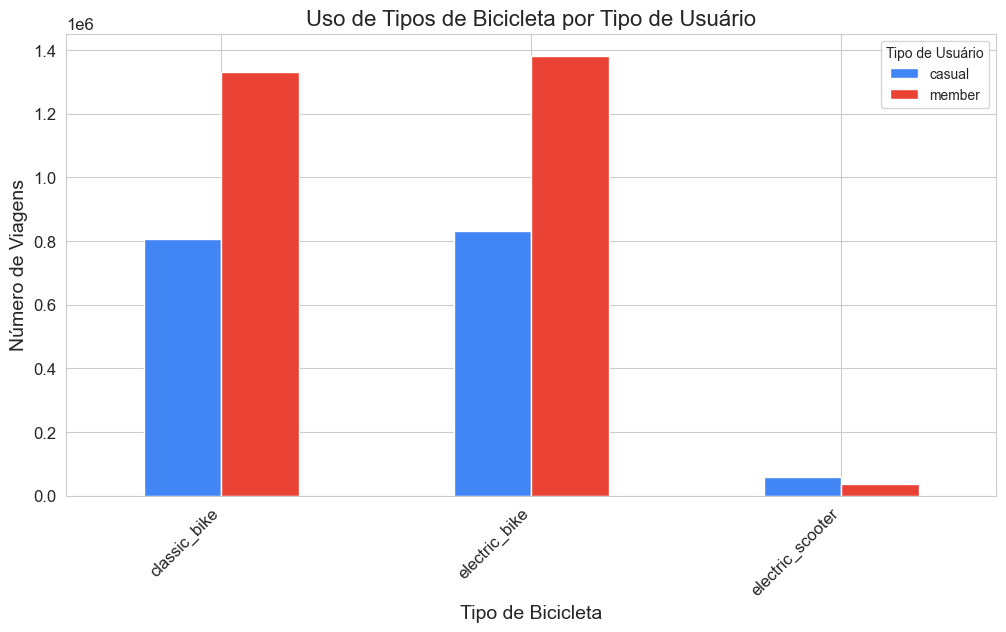

In [132]:
# Contagem por tipo de bicicleta e usuário
bike_type_counts = df.groupby(['rideable_type', 'member_casual']).size().unstack().fillna(0)

# Visualização: Gráfico de barras
plt.figure(figsize=(10, 6))
bike_type_counts.plot(kind='bar', color=sns.color_palette(palette))
plt.title('Uso de Tipos de Bicicleta por Tipo de Usuário')
plt.xlabel('Tipo de Bicicleta')
plt.ylabel('Número de Viagens')
plt.legend(title='Tipo de Usuário')
plt.xticks(rotation=45, ha='right')
plt.savefig('imgs/bike_type_counts.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 6. Estações Mais Populares

<Figure size 1200x600 with 0 Axes>

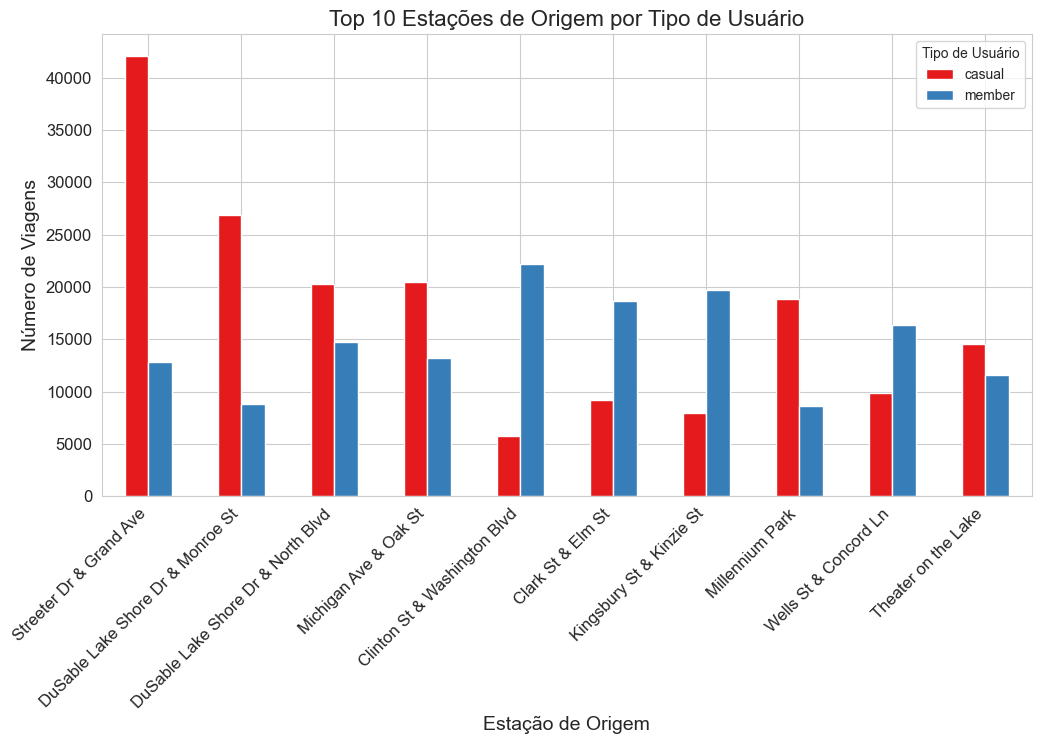

In [143]:
# Filtra estações com nome válido
df_filtrado = df[df['start_station_name'].str.lower() != 'unknown']

# Top 10 estações de origem por tipo de usuário
top_start_stations = df_filtrado.groupby(['start_station_name', 'member_casual']).size().unstack().fillna(0)
top_start_stations['total'] = top_start_stations.sum(axis=1)
top_start_stations = top_start_stations.sort_values('total', ascending=False).head(10)

# Visualização: Gráfico de barras
plt.figure(figsize=(12, 6))
top_start_stations[['casual', 'member']].plot(kind='bar', color=sns.color_palette("Set1"))
plt.title('Top 10 Estações de Origem por Tipo de Usuário')
plt.xlabel('Estação de Origem')
plt.ylabel('Número de Viagens')
plt.legend(title='Tipo de Usuário')
plt.xticks(rotation=45, ha='right')
plt.savefig('imgs/top_start_stations.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 7. Padrões Sazonais

<Figure size 1000x600 with 0 Axes>

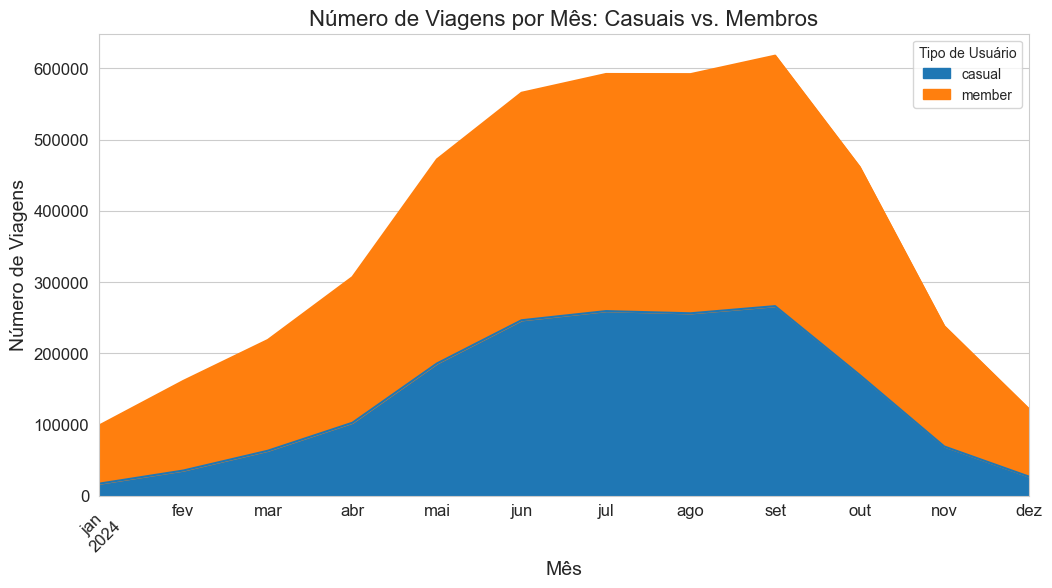

In [134]:
# Contagem de viagens por mês
monthly_counts = df.groupby(['month', 'member_casual']).size().unstack().fillna(0)

# Visualização: Gráfico de áreas
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='area', stacked=True, color=sns.color_palette("tab10"))
plt.title('Número de Viagens por Mês: Casuais vs. Membros')
plt.xlabel('Mês')
plt.ylabel('Número de Viagens')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Usuário')
plt.savefig('imgs/monthly_counts.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 8. Viagens de Ida e Volta

Proporção de viagens de ida e volta:
 member_casual
casual    0.007212
member    0.002007
Name: is_round_trip, dtype: float64


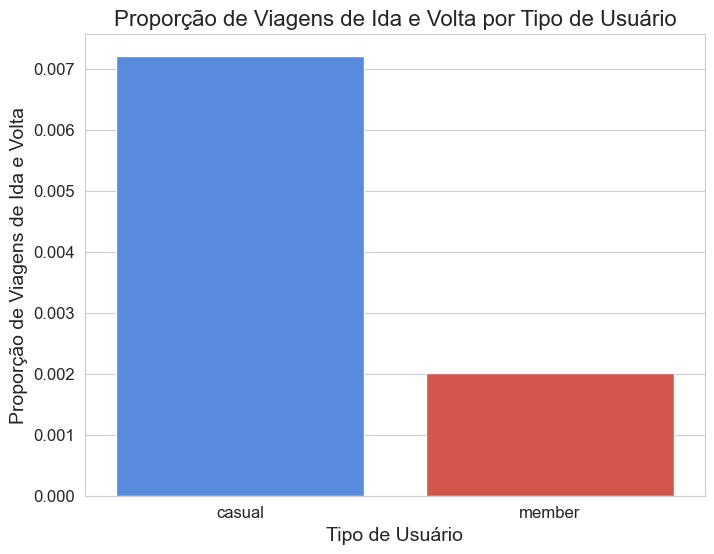

In [135]:
# Identificar viagens de ida e volta
df['is_round_trip'] = df['start_station_id'] == df['end_station_id']
round_trip_proportion = df.groupby('member_casual')['is_round_trip'].mean()
print("Proporção de viagens de ida e volta:\n", round_trip_proportion)

# Visualização: Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=round_trip_proportion.index, y=round_trip_proportion.values, hue=round_trip_proportion.index)
plt.title('Proporção de Viagens de Ida e Volta por Tipo de Usuário')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Proporção de Viagens de Ida e Volta')
plt.savefig('imgs/round_trip_proportion.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [136]:
# Contagem de viagens por mês e tipo de usuário
monthly_counts = df.groupby(['month', 'member_casual']).size().unstack().fillna(0)

# Adicionar coluna para total de viagens por mês
monthly_counts['total'] = monthly_counts['casual'] + monthly_counts['member']

# Ordenar por total de viagens (opcional, para visualização)
monthly_counts = monthly_counts.sort_values('total', ascending=False)

# Identificar mês mais e menos movimentado
most_busy_month = monthly_counts['total'].idxmax()
least_busy_month = monthly_counts['total'].idxmin()

print("Mês mais movimentado (total de viagens):")
print(monthly_counts.loc[most_busy_month])
print("\nMês menos movimentado (total de viagens):")
print(monthly_counts.loc[least_busy_month])

# Mês mais movimentado por tipo de usuário
most_busy_casual = monthly_counts['casual'].idxmax()
most_busy_member = monthly_counts['member'].idxmax()
print("\nMês mais movimentado para casuais:", most_busy_casual)
print("Mês mais movimentado para membros:", most_busy_member)

Mês mais movimentado (total de viagens):
member_casual
casual    266105
member    351676
total     617781
Name: 2024-09, dtype: int64

Mês menos movimentado (total de viagens):
member_casual
casual    16755
member    81430
total     98185
Name: 2024-01, dtype: int64

Mês mais movimentado para casuais: 2024-09
Mês mais movimentado para membros: 2024-09


<Figure size 1200x600 with 0 Axes>

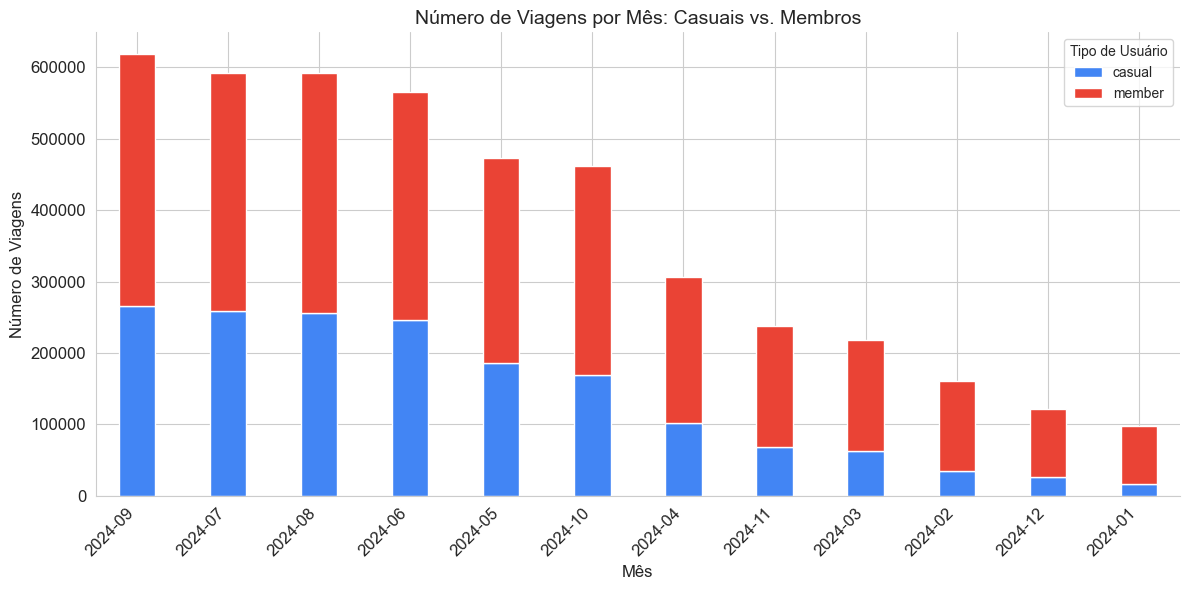

In [140]:
# Visualização: Gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
monthly_counts[['casual', 'member']].plot(
    kind='bar', 
    stacked=True, 
    color=sns.color_palette(palette), 
    width=0.4
)
plt.title('Número de Viagens por Mês: Casuais vs. Membros', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Viagens', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Usuário', fontsize=10)
sns.despine()
plt.tight_layout()
plt.savefig('imgs/monthly_trip_counts.png',dpi=300, bbox_inches='tight')
plt.show()
plt.close()